# Lab5 Integtation

In [336]:
import numpy as np
import matplotlib.pyplot as plt

In [505]:
start = -np.pi
end   = np.pi

func = lambda x: np.exp(x)
Real_answ = np.exp(end) - np.exp(start)

# func = lambda x: x**2
# Real_answ = ((end**3) - (start**3))/3

# func = lambda x: np.sin(x) + 3
# Real_answ = -np.cos(end) + np.cos(start) + 3*(end) - 3*(start)

# func = lambda x: np.abs(x)
# Real_answ = np.sign(start)*start - np.sign(end)*end

# func = lambda x: 1/(25*x**2 + 1)
# Real_answ = 1/5*np.arctan(5*start) - 1/5*np.arctan(5*end)

# Rectangles

In [506]:
def Integr_rec(func, x):
    n = len(x)
    y = func(x)
    ans = np.sum(y[0:n - 1]*([x[i + 1] - x[i] for i in range(n - 1)]))
    blocks = [ [y[i + 1], x[i], x[i + 1]] for i in range(n - 1)]
    return ans, blocks

Integral_my: 15.965523815584042, Integral_real: 23.097478714515496
Error: 7.131954898931454


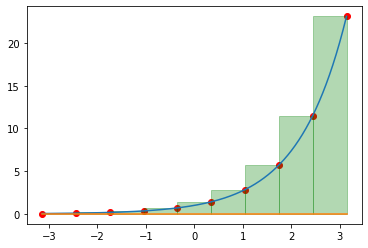

In [507]:
n  = 10
x  = np.linspace(start, end, n)
y  = func(x)
xx = np.linspace(start, end, 1000)
yy = func(xx)

integr, blocks = Integr_rec(func, x)

print("Integral_my: {}, Integral_real: {}".format(integr, Real_answ))
print("Error: {}".format(np.abs(integr - Real_answ)))
plt.plot(xx, yy)
plt.plot(xx, len(xx)*[0])
plt.scatter (x, y, c='r')

for i in range(len(blocks)):
    plt.fill_between([blocks[i][2], blocks[i][1]], [blocks[i][0], blocks[i][0]], color='g', alpha=0.3)

### Error

array([22.82595766, 19.82012553, 16.30370578, 13.57598545, 11.55017056,
       10.02064145,  8.83578785,  7.89508146,  7.1319549 ,  6.5013636 ,
        5.97201592,  5.52160924,  5.13386895,  4.79666524,  4.5007852 ,
        4.23911266,  4.00606769,  3.79721561,  3.60898892,  3.43848608,
        3.28332366,  3.14152597,  3.01144175,  2.89168033,  2.78106233,
        2.67858107,  2.58337217,  2.49468926,  2.41188459,  2.33439324,
        2.26172036,  2.19343061,  2.12913949,  2.06850616,  2.01122739,
        1.95703256,  1.90567933,  1.85695013,  1.81064898,  1.76659897,
        1.72463993,  1.68462652,  1.64642658,  1.60991963,  1.57499563,
        1.54155385,  1.50950196,  1.47875511])

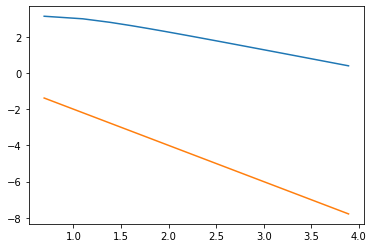

In [528]:
def Ierr(Ifunc):
    err = np.array([])
    rng = range(2, 50)
    for n in rng:
        xerr = np.linspace(start, end, n)
        ans, b = Ifunc(func, xerr)
        nerr = np.abs(ans - Real_answ)
        err = np.append(err, nerr)    
        
    plt.plot(np.log([i for i in rng]), np.log(err))  
    plt.plot(np.log([i for i in rng]), np.log([1/(i**2) for i in rng]))
    return err
Ierr(Integr_rec)

# Center rectangles

In [464]:
def Integr_crec(f, x):
    n = len(x)
    ans = 0
    for i in range(1, n):
        ans += f((x[i] + x[i - 1])/2)*(x[i] - x[i - 1])
    blocks = [ [f((x[i + 1] + x[i])/2), x[i], x[i + 1]] for i in range(n - 1)]
    return ans, blocks

Integral_my: 22.635002385409102, Integral_real: 23.097478714515496
Error: 0.46247632910639425


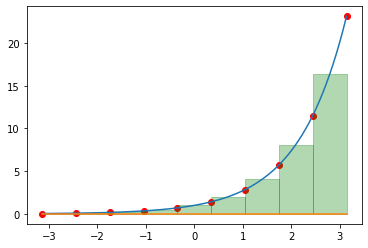

In [465]:
n  = 10
x  = np.linspace(start, end, n)
y  = func(x)
xx = np.linspace(start, end, 1000)
yy = func(xx)

integr, blocks = Integr_crec(func, x)

print("Integral_my: {}, Integral_real: {}".format(integr, Real_answ))
print("Error: {}".format(np.abs(integr - Real_answ)))
plt.plot(xx, yy)
plt.plot(xx, len(xx)*[0])
plt.scatter (x, y, c='r')

for i in range(len(blocks)):
    plt.fill_between([blocks[i][2], blocks[i][1]], [blocks[i][0], blocks[i][0]], color='g', alpha=0.3)


## Error

array([1.68142934e+01, 7.33184536e+00, 3.73757712e+00, 2.21417748e+00,
       1.45255665e+00, 1.02257703e+00, 7.57542632e-01, 5.83143862e-01,
       4.62476329e-01, 3.75608554e-01, 3.11036021e-01, 2.61751412e-01,
       2.23293192e-01, 1.92713285e-01, 1.68001283e-01, 1.47748556e-01,
       1.30944620e-01, 1.16849496e-01, 1.04911335e-01, 9.47118577e-02,
       8.59293901e-02, 7.83132951e-02, 7.16659589e-02, 6.58298871e-02,
       6.06783183e-02, 5.61083031e-02, 5.20355336e-02, 4.83904367e-02,
       4.51151899e-02, 4.21614185e-02, 3.94884030e-02, 3.70616701e-02,
       3.48518780e-02, 3.28339267e-02, 3.09862426e-02, 2.92902009e-02,
       2.77296549e-02, 2.62905505e-02, 2.49606091e-02, 2.37290655e-02,
       2.25864489e-02, 2.15244012e-02, 2.05355232e-02, 1.96132462e-02,
       1.87517218e-02, 1.79457301e-02, 1.71905996e-02, 1.64821399e-02])

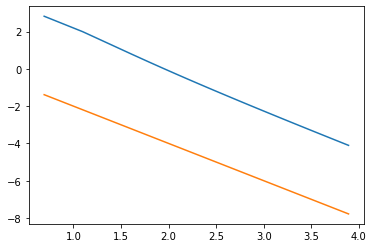

In [529]:
Ierr(Integr_crec)  

# Trapeze

In [467]:
def Integr_trap(f, x):
    n = len(x)
    ans = 0
    for i in range(1, n):
        ans += ((f(x[i]) + f(x[i - 1]))/2)*(x[i] - x[i - 1])
    blocks = [ [f(x[i + 1]), f(x[i]), x[i], x[i + 1]] for i in range(n - 1)]
    return ans,blocks

Integral_my: 24.028064865136095, Integral_real: 23.097478714515496
Error: 0.9305861506205986


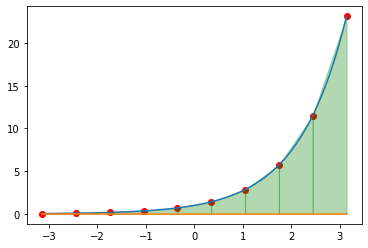

In [468]:
n  = 10
x  = np.linspace(start, end, n)
y  = func(x)
xx = np.linspace(start, end, 1000)
yy = func(xx)

integr, blocks = Integr_trap(func, x)

print("Integral_my: {}, Integral_real: {}".format(integr, Real_answ))
print("Error: {}".format(np.abs(integr - Real_answ)))
plt.plot(xx, yy)
plt.plot(xx, len(xx)*[0])
plt.scatter (x, y, c='r')

for i in range(len(blocks)):
    plt.fill_between([blocks[i][3], blocks[i][2]], [blocks[i][0], blocks[i][1]], color='g', alpha=0.3)


## Error

array([4.97369118e+01, 1.64613092e+01, 7.88391737e+00, 4.56473191e+00,
       2.96240333e+00, 2.07317012e+00, 1.53033636e+00, 1.17527722e+00,
       9.30586151e-01, 7.54923341e-01, 6.24608575e-01, 5.25296547e-01,
       4.47890235e-01, 3.86396863e-01, 3.36739425e-01, 2.96066677e-01,
       2.62336391e-01, 2.34054911e-01, 2.10109475e-01, 1.89657394e-01,
       1.72051080e-01, 1.56786277e-01, 1.43465620e-01, 1.31772567e-01,
       1.21452452e-01, 1.12298521e-01, 1.04141513e-01, 9.68417892e-02,
       9.02833235e-02, 8.43690711e-02, 7.90173601e-02, 7.41590605e-02,
       6.97353416e-02, 6.56958854e-02, 6.19974497e-02, 5.86027072e-02,
       5.54793008e-02, 5.25990700e-02, 4.99374147e-02, 4.74727680e-02,
       4.51861588e-02, 4.30608451e-02, 4.10820078e-02, 3.92364909e-02,
       3.75125829e-02, 3.58998304e-02, 3.43888796e-02, 3.29713401e-02])

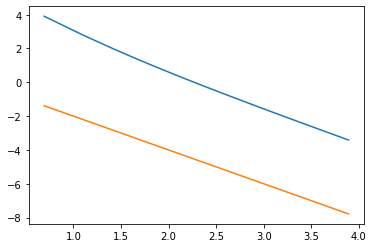

In [530]:
Ierr(Integr_trap)  

# Simpson's rule

In [470]:
from scipy.interpolate import BarycentricInterpolator
def Integr_sim(f, x):
    n = len(x)
    ans = 0
    for i in range(0, n - 1):
        ans += (f(x[i]) + 4 * f((x[i] + x[i + 1])/2) + f(x[i + 1])) * (x[i + 1] - x[i])
    ans /= 6    
    
    blocks = [ [f(x[i]), f((x[i] + x[i + 1])/2), f(x[i + 1]), x[i], x[i + 1]] for i in range(n - 1)]
    return ans,blocks

Integral_my: 23.099356545318102, Integral_real: 23.097478714515496
Error: 0.0018778308026057289


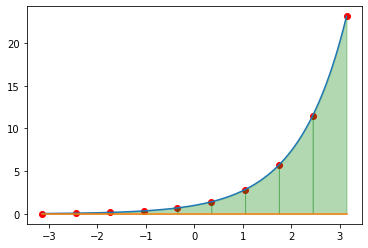

In [471]:
n  = 10
x  = np.linspace(start, end, n)
y  = func(x)
xx = np.linspace(start, end, 1000)
yy = func(xx)

integr, blocks = Integr_sim(func, x)

print("Integral_my: {}, Integral_real: {}".format(integr, Real_answ))
print("Error: {}".format(np.abs(integr - Real_answ)))
plt.plot(xx, yy)
plt.plot(xx, len(xx)*[0])
plt.scatter (x, y, c='r')

for i in range(0, n -1):
    xxx = np.linspace(x[i], x[i + 1], 50)
    inter_X = [x[i], (x[i] + x[i + 1])/2, x[i + 1]]
    inter_Y = [func(x[i]), func((x[i] + x[i + 1])/2), func(x[i + 1])]
    interpol_func = BarycentricInterpolator(inter_X, inter_Y)
    yyy = interpol_func(xxx)
    plt.fill_between(xxx, yyy, color='g', alpha=0.3)


## Error

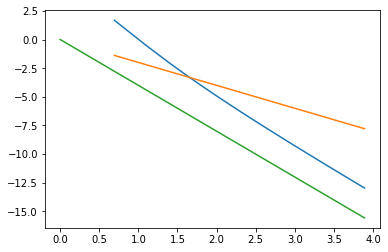

In [540]:
Ierr(Integr_sim)
plt.plot(np.log([i for i in range(1, 50)]), np.log([1/i**4 for i in range(1, 50)]))

# Runge

## Rectangles

In [490]:
def runge(Ifunc, n0, eps=1e-2):
    
    
    
    x0  = np.linspace(start, end, n0)
    y0  = func(x)

    I0, blocks0 = Ifunc(func, x0)

    print("Start_intergal: {}, Integral_real: {}".format(I0, Real_answ))
    print("Start_Error: {}".format(np.abs(I0 - Real_answ)))
    print("n start: {}\n\n".format(n0))
    
    n2 = n0*2
    x2 = np.linspace(start, end, n2)
    I2, blocks2 = Ifunc(func, x2)

    delta = (np.abs(I2 - I0))/3

    while delta  > eps:

        I0 = I2
        n2 = n2*2
        x2 = np.linspace(start, end, n2)
        I2, blocks = Ifunc(func, x2)

        delta = (np.abs(I2 - I0))/3

    print("Integral_my: {}, Integral_real: {}".format(I2, Real_answ))
    print("Error: {}, RungeError: {}".format(np.abs(I2 - Real_answ), delta))
    print("n start: {}, n_end: {}".format(n0, n2))

    return n2

In [499]:
n0=3
eps = 1e-3
runge(Integr_rec, n0, eps)

Start_intergal: 3.1542736548747463, Integral_real: -0.6028880580466454
Start_Error: 3.7571617129213917
n start: 3


Integral_my: 0.6028861852687305, Integral_real: -0.6028880580466454
Error: 1.2057742433153757, RungeError: 3.656442433593495e-05
n start: 3, n_end: 96


96

# Center rectels

In [500]:
n0=3
eps = 1e-3
runge(Integr_crec, n0, eps)

Start_intergal: 0.10023422748753111, Integral_real: -0.6028880580466454
Start_Error: 0.7031222855341764
n start: 3


Integral_my: 0.6028889978946923, Integral_real: -0.6028880580466454
Error: 1.2057770559413377, RungeError: 3.561070639442517e-05
n start: 3, n_end: 96


96

# Trapeze

In [501]:
n0=3
eps = 1e-3
runge(Integr_trap, n0, eps)

Start_intergal: 3.1542736548747463, Integral_real: -0.6028880580466454
Start_Error: 3.7571617129213917
n start: 3


Integral_my: 0.6028861852687307, Integral_real: -0.6028880580466454
Error: 1.2057742433153762, RungeError: 3.6564424336119984e-05
n start: 3, n_end: 96


96

# Simon's method

In [502]:
n0=3
eps = 1e-3
runge(Integr_sim, n0, eps)

Start_intergal: 1.1182473699499362, Integral_real: -0.6028880580466454
Start_Error: 1.7211354279965816
n start: 3


Integral_my: 0.602888060352705, Integral_real: -0.6028880580466454
Error: 1.2057761183993505, RungeError: 1.1552329484206444e-05
n start: 3, n_end: 96


96

# Improper integrals

In [541]:
imfunc = lambda x: np.cos(x)/np.sqrt(x)


/tmp/ipykernel_6031/4020757163.py:1: RuntimeWarning: divide by zero encountered in true_divide
  imfunc = lambda x: np.cos(x)/np.sqrt(x)


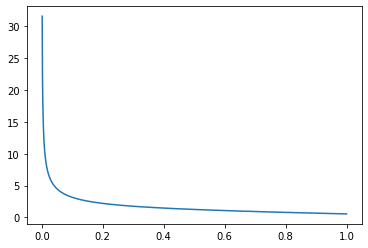

In [543]:
xx = np.linspace(0, 1, 1000)
plt.plot(xx, imfunc(xx))